In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from scipy import stats
from sklearn.model_selection import train_test_split
from imblearn import over_sampling, under_sampling
from imblearn.over_sampling import RandomOverSampler
import collections
from collections import Counter

print(f"Numpy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")
print(f"Seaborn version: {sns.__version__}")

Numpy version: 1.21.6
Pandas version: 1.3.5
Seaborn version: 0.11.2


In [ ]:
rcParams['figure.figsize'] = (10, 7)
rcParams['lines.linewidth'] = 2.5
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving marketing_campaign.csv to marketing_campaign.csv


Dataset: https://www.kaggle.com/datasets/rodsaldanha/arketing-campaign

In [ ]:
df = pd.read_csv("marketing_campaign.csv",sep=";")
df.sample(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2125,2088,1972,Graduation,Together,84906.0,0,0,2013-10-04,98,997,...,2,0,1,1,0,1,0,3,11,0
931,538,1989,Graduation,Single,46107.0,1,0,2014-02-10,78,31,...,3,0,0,0,0,0,0,3,11,0
1297,5543,1966,Graduation,Together,57811.0,0,1,2013-06-24,49,545,...,5,0,1,0,0,0,0,3,11,0
18,6565,1949,Master,Married,76995.0,0,1,2013-03-28,91,1012,...,5,0,0,0,1,0,0,3,11,0
860,4297,1969,Graduation,Together,23228.0,1,0,2014-01-26,71,13,...,8,0,0,0,0,0,0,3,11,0


# EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Observations:

The dataset has 29 columns and 2240 rows</br>
The income column has 2216 non-null value and 24 null value

## Check duplicate and null value

In [ ]:
df[df.duplicated(keep=False) == True]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


No duplicate in data

In [ ]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [ ]:
(df.isna().sum()/df.shape[0]*100)['Income']

1.0714285714285714

Null value in income column is only 1.07% of the dataset, since the null value is less than 5%, hence it will be drop in the next step (data pre-processing)

## Numeric data

In [ ]:
nums = ['Income','Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 
        'NumWebVisitsMonth','Kidhome', 'Teenhome']

In [ ]:
df[nums].describe()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Kidhome,Teenhome
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,0.441787,0.505415
std,25173.076661,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,0.536896,0.544181
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35303.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000
50%,51381.500000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000
75%,68522.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,1.000000,1.000000
max,666666.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,2.000000,2.000000


## Categorical data

In [ ]:
cats = ['Education', 'Marital_Status', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response']

In [ ]:
df[cats].describe(include='int64')

,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,0.149107
std,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.356274
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df[cats].describe(include='object')

,Education,Marital_Status
count,2240,2240
unique,5,8
top,Graduation,Married
freq,1127,864


In [ ]:
df['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

2n Cycle and Master have the same meaning, so 2n Cycle will be included in Master in the next step (data pre-processing)

In [ ]:
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

Single and Alone have the same meaning, so Alone will be included in Single in the next step (data pre-processing) </br>
Absurd and YOLO are ambiguous so both of them will be categorized as Others in the next step (data pre-processing)

## Univariate Analysis

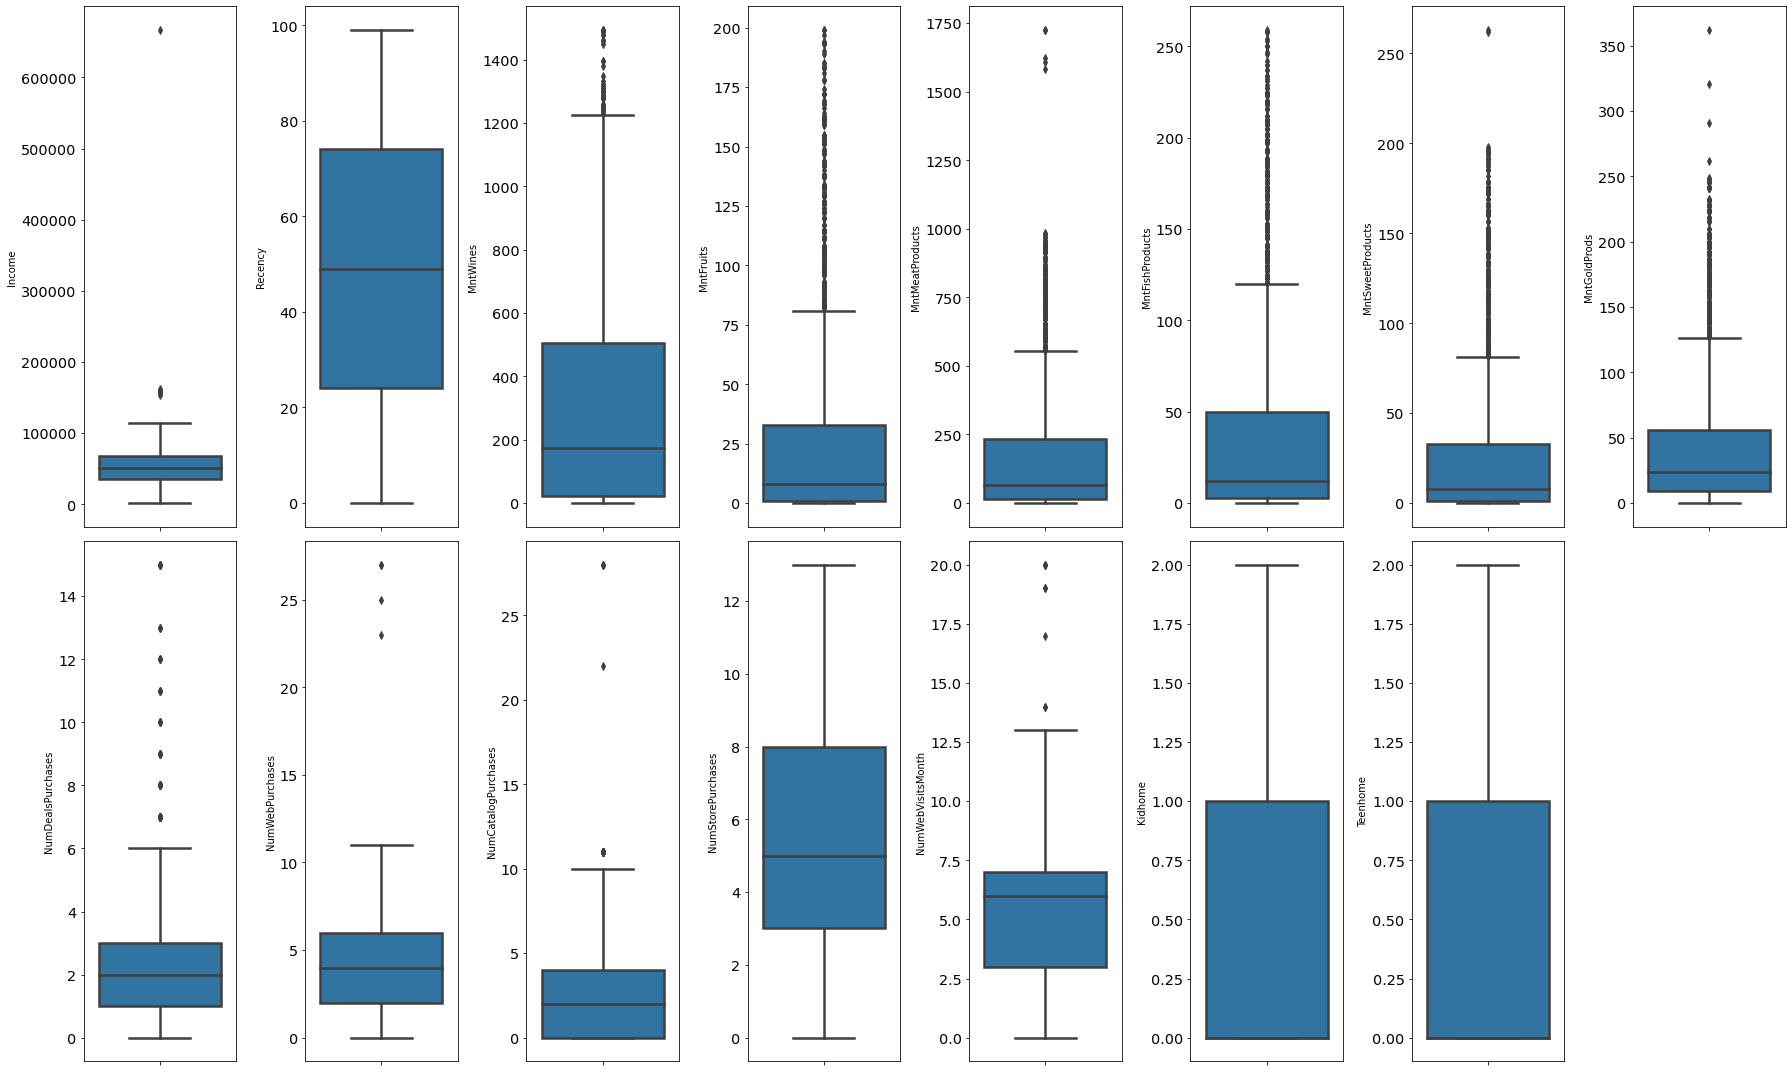

In [ ]:
# Individual Boxplot
plt.figure(figsize=(25, 15))
for i in range(0, len(nums)):
    plt.subplot(2, 8, i+1)
    sns.boxplot(y=df[nums[i]], orient='v')
    plt.tight_layout()

There are outliers in several columns: </br>
Year_Birth, Income, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, dan NumWebVisitMonth.

In the next step (data pre-processing), outliers will be handled with log transformation

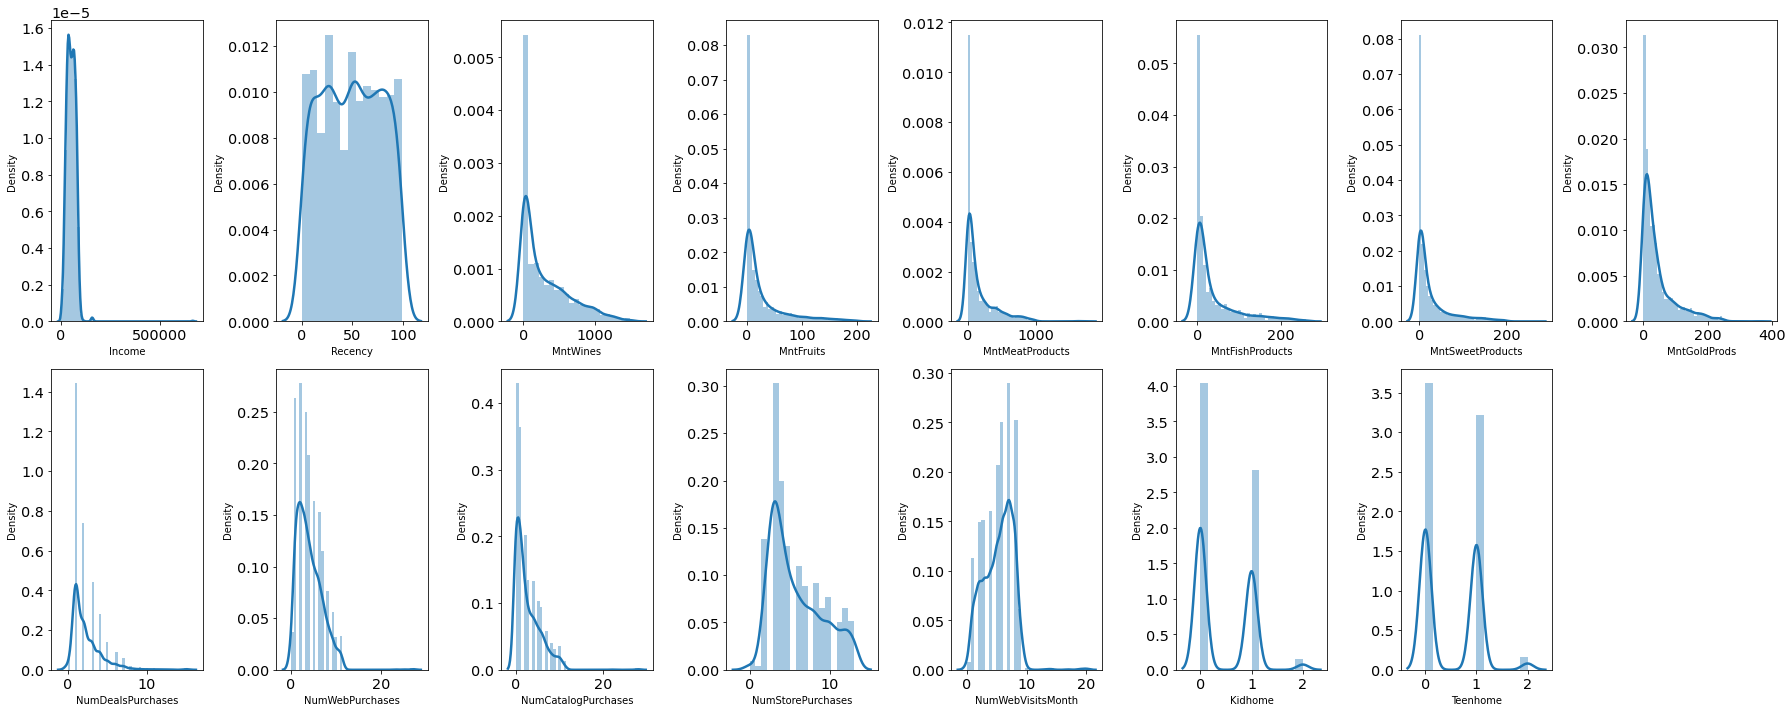

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Individual Distplot
plt.figure(figsize=(25, 10))
for i in range(0, len(nums)):
    plt.subplot(2, 8, i+1) 
    sns.distplot(df[nums[i]])
    plt.tight_layout()

Column that has normal distribution: Recency </br>
Columns that have right skewed distribution: Income, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, and NumWebVisitsMonth

In the next step (data pre-processing), columns with right skewed distribution will be handled with log transformation

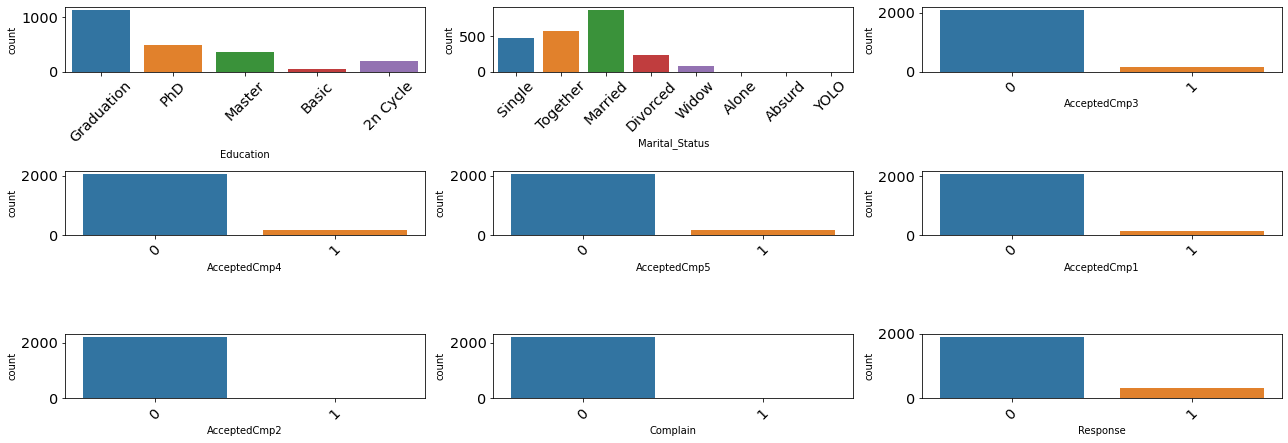

In [ ]:
# Individual Countplot
plt.figure(figsize=(18, 8))
for i in range(0, len(cats)):
    plt.subplot(4, 3, i+1)
    sns.countplot(df[cats[i]], orient='h')
    plt.xticks(rotation=45)
    plt.tight_layout()

Education column will be processed with Label Encoding, while Marital_Status column will be processed with One Hot Encoding (OHE)

## Multivariate Analysis

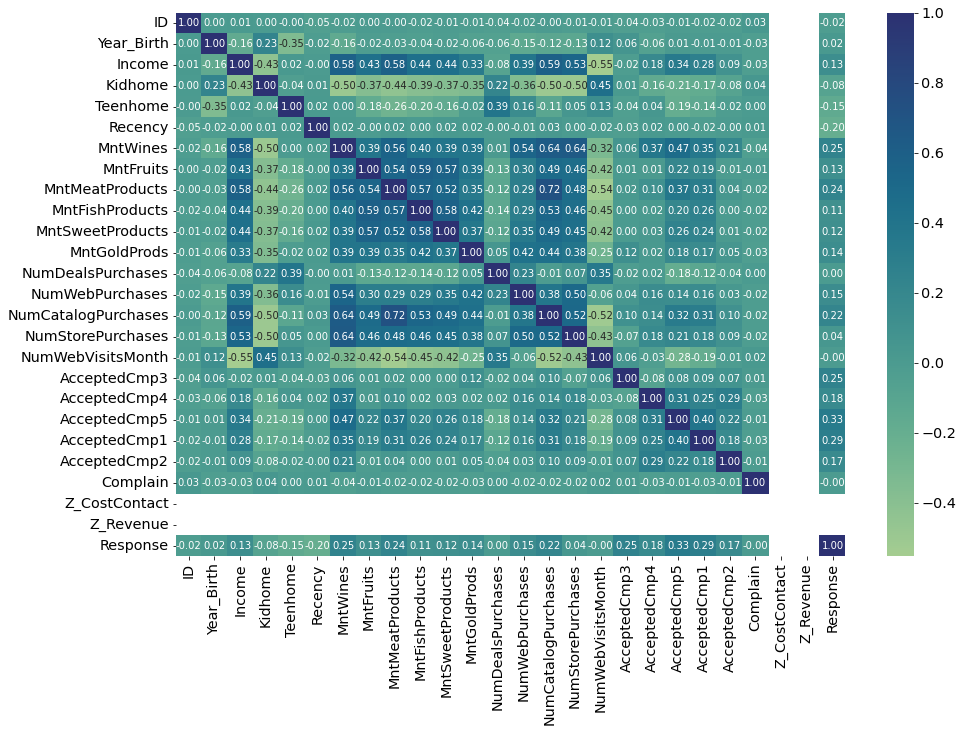

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), cmap='crest', annot=True, fmt='.2f')

Columns that have high positive correlation (0.7 <= r <= 0.9): MntMeatProducts and NumCatalogPurchases

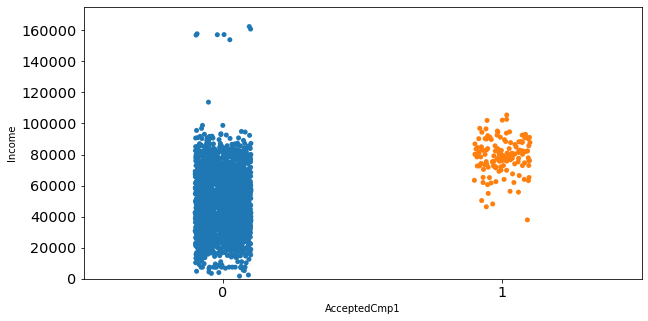

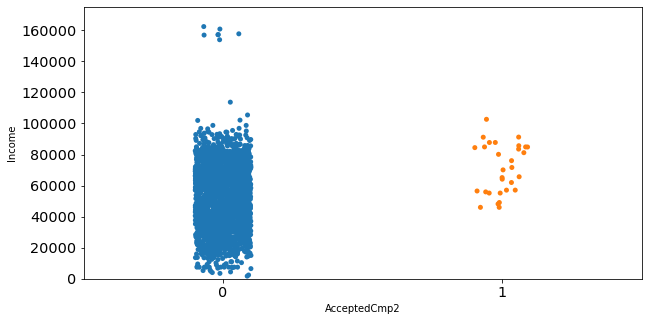

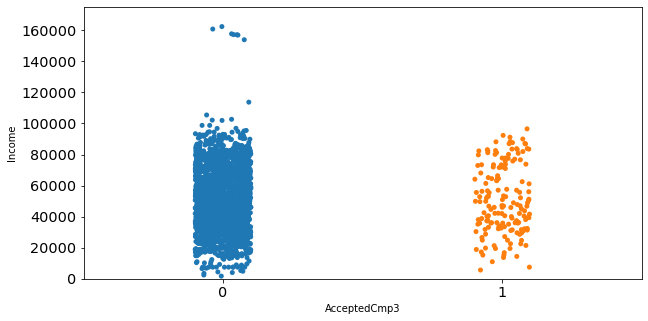

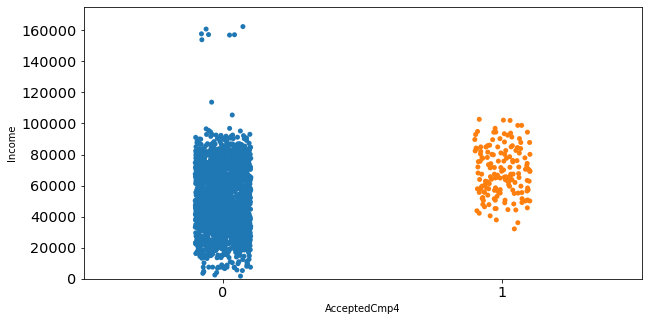

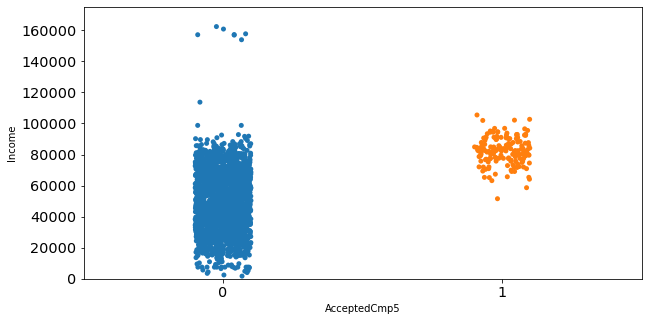

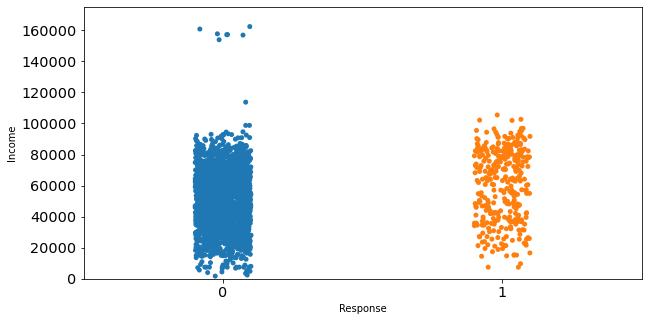

In [ ]:
# Income vs. Campaign

Accepted_Campaign = ['AcceptedCmp1' ,'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']

for i in Accepted_Campaign:
  plt.figure(figsize=(10, 5))
  sns.stripplot(data=df, x=i, y='Income')
  plt.ylim(0, 175000)
  plt.show()

There are no customers with income higher than 120000 that accepted the marketing campaign. So company should focus campaigning to customers with income lower than 120000.

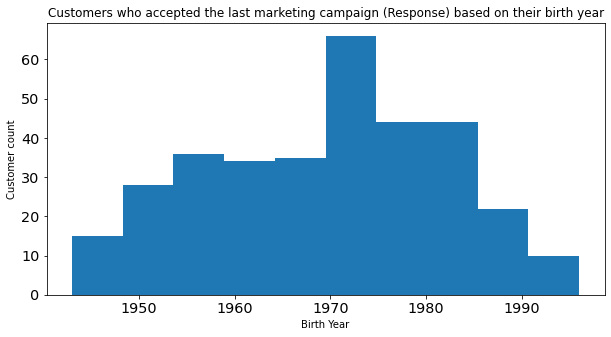

In [ ]:
# Birth year vs. Response

df_resp_yes = df[df['Response'] == 1]
plt.figure(figsize=(10, 5))
plt.hist(data=df_resp_yes, x='Year_Birth')
plt.xlabel('Birth Year')
plt.ylabel('Customer count')
plt.title('Customers who accepted the last marketing campaign (Response) based on their birth year')
plt.show()

The highest category of customers who accepted the last marketing campaign (Response) were born in the years 1970-1975. If the company has to prioritize only a few customers to offer a campaign, then it can choose customers born in 1970-1985.

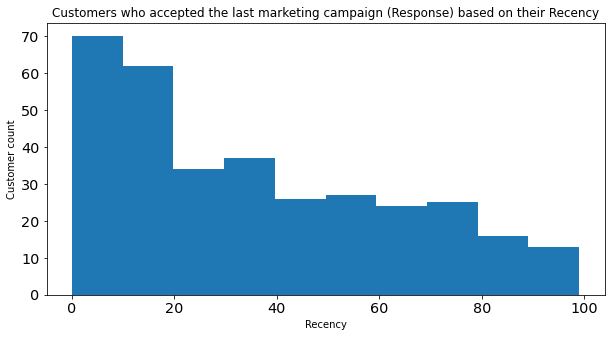

In [ ]:
# Recency vs. Response

df_resp_yes = df[df['Response'] == 1]
plt.figure(figsize=(10, 5))
plt.hist(data=df_resp_yes, x='Recency')
plt.xlabel('Recency')
plt.ylabel('Customer count')
plt.title('Customers who accepted the last marketing campaign (Response) based on their Recency')
plt.show()

Based on Recency (the number of days since the customer last made a purchase), the lower the recency, the more likely the customer is to accept the company's last marketing campaign (Response). For the next marketing campaign, the company can focus on customers with low recency.

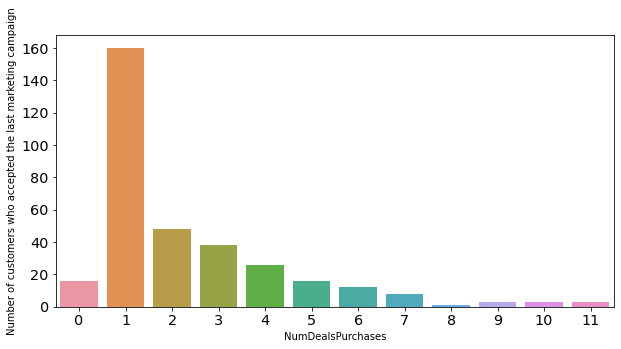

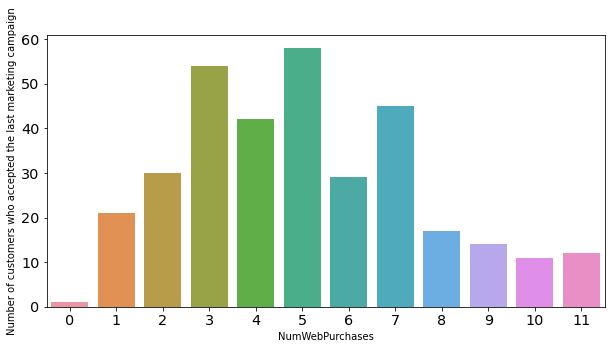

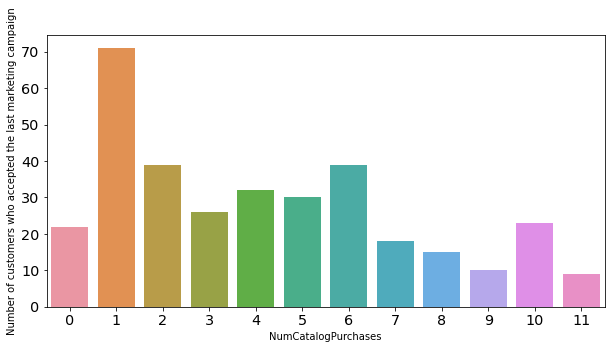

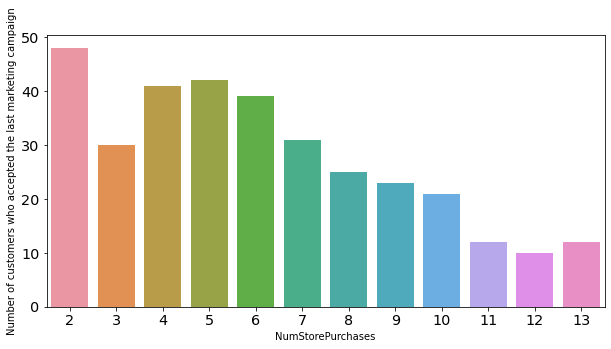

In [ ]:
# Purchase type vs. Response

purchase_type = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

df_resp_yes = df[df['Response'] == 1]
for i in purchase_type:
  plt.figure(figsize=(10, 5))
  sns.countplot(data=df_resp_yes, x=i)
  plt.xlabel(i)
  plt.ylabel('Number of customers who accepted the last marketing campaign')
  plt.show()

The fewer purchases made (either using discounts or via the web, catalogs, or stores), the more likely the customer is to accept the last marketing campaign (Response). For the next marketing campaign, the company can target customers who have made a small number of purchases.

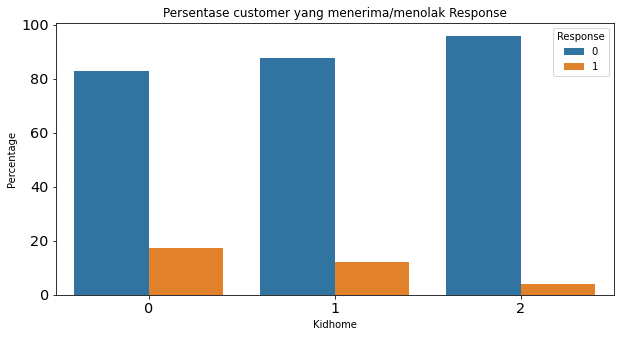

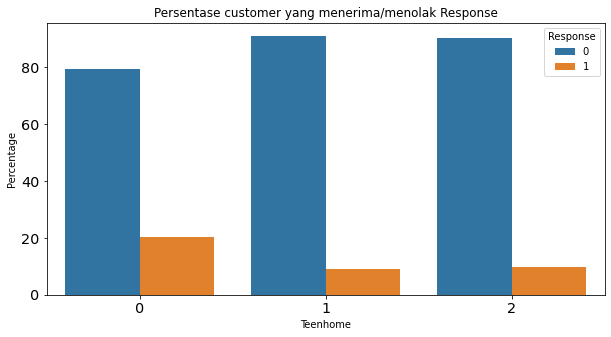

In [ ]:
# Kid and teen vs. Response

kid_teen = ['Kidhome', 'Teenhome']

for i in kid_teen:
  df_temp = df.groupby([i, 'Response'])['ID'].count().reset_index()
  df_temp_2 = df.groupby([i])['ID'].count().reset_index()
  df_merge = df_temp.merge(df_temp_2, on=i, how='inner')
  df_merge.columns = [i, 'Response', 'CountCust', 'TotalCust']
  df_merge['Percentage'] = df_merge['CountCust'] / df_merge['TotalCust'] * 100
  
  plt.figure(figsize=(10, 5))
  sns.barplot(x = i, y = 'Percentage', data = df_merge, hue = 'Response')
  plt.title('Persentase customer yang menerima/menolak Response')
  plt.show()

The higher the number of children/teen a customer has, the less likely the customer is to accept the last marketing campaign (Response). There is a possibility that the campaign offered are not related to child products.

# Data Pre-Processing

## Handling Missing Value

In [ ]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [ ]:
(df.isna().sum()/df.shape[0]*100)['Income']

1.0714285714285714

Null value in income column will be dropped since it is only 1.07% of the dataset (less than 5%)

In [ ]:
df.dropna(inplace=True, subset=['Income'])

In [ ]:
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

## Feature Extraction

In [ ]:
df['Age'] = 2023 - df['Year_Birth']
df['Dependents'] = df['Kidhome'] + df['Teenhome']

In [ ]:
df.sample()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Dependents
971,1734,1968,PhD,Together,40706.0,2,1,2013-01-17,37,59,...,0,0,0,0,0,3,11,0,55,3


## Label Encoding

Label Encoding will be done to Education column that has ordinal type of data

In [ ]:
x = np.array(df['Education'])
print(np.unique(x))

['2n Cycle' 'Basic' 'Graduation' 'Master' 'PhD']


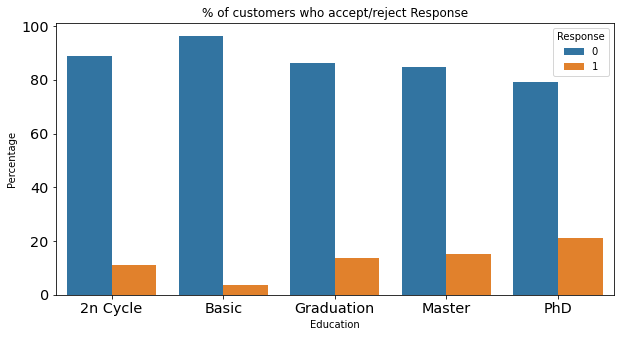

In [ ]:
df_temp = df.groupby(['Education', 'Response'])['ID'].count().reset_index()
df_temp_2 = df.groupby(['Education'])['ID'].count().reset_index()
df_merge = df_temp.merge(df_temp_2, on='Education', how='inner')
df_merge.columns = ['Education', 'Response', 'CountCust', 'TotalCust']
df_merge['Percentage'] = df_merge['CountCust'] / df_merge['TotalCust'] * 100
  
plt.figure(figsize=(10, 5))
sns.barplot(x = 'Education', y = 'Percentage', data = df_merge, hue = 'Response')
plt.title('% of customers who accept/reject Response')
plt.show()

The categories of 2n Cycle and Master have the same meaning, hence 2n Cycle will be included in Master

In [ ]:
df['Education'] = df['Education'].replace(['2n Cycle'],'Master')
x = np.array(df['Education'])
print(np.unique(x))

['Basic' 'Graduation' 'Master' 'PhD']


Changing categorical feature into numerical:

- 'Basic' --> 0
- 'Graduation' --> 1
- 'Master' --> 2
- 'PhD' --> 3

In [ ]:
mapping_education = {
    'Basic' : 0,
    'Graduation' : 1,
    'Master' : 2,
    'PhD' : 3    
}
df['Education'] = df['Education'].map(mapping_education)

In [ ]:
df.sample()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Dependents
754,7723,1979,1,Together,75507.0,0,0,2014-05-02,56,709,...,0,0,0,0,0,3,11,0,44,0


## One Hot Encoding (OHE)

One Hot Encoding will be done to Marital_Status column that has more than 2 categories and do not have ordinal type of data

In [ ]:
x = np.array(df['Marital_Status'])
print(np.unique(x))

['Absurd' 'Alone' 'Divorced' 'Married' 'Single' 'Together' 'Widow' 'YOLO']


Changing catgeories: </br>
- Absurd and YOLO -> Others </br>
- Alone -> Single </br>

In [ ]:
df['Marital_Status'] = df['Marital_Status'].replace(['Absurd', 'YOLO'],'Others')
df['Marital_Status'] = df['Marital_Status'].replace(['Alone'],'Single')

x = np.array(df['Marital_Status'])
print(np.unique(x))

['Divorced' 'Married' 'Others' 'Single' 'Together' 'Widow']


In [ ]:
ohe = pd.get_dummies(df['Marital_Status'], prefix = 'Status')
df = df.join(ohe)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   int64  
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

In [ ]:
# Remove Marital Status column
df = df.drop(columns=['Marital_Status']).copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   int64  
 3   Income               2216 non-null   float64
 4   Kidhome              2216 non-null   int64  
 5   Teenhome             2216 non-null   int64  
 6   Dt_Customer          2216 non-null   object 
 7   Recency              2216 non-null   int64  
 8   MntWines             2216 non-null   int64  
 9   MntFruits            2216 non-null   int64  
 10  MntMeatProducts      2216 non-null   int64  
 11  MntFishProducts      2216 non-null   int64  
 12  MntSweetProducts     2216 non-null   int64  
 13  MntGoldProds         2216 non-null   int64  
 14  NumDealsPurchases    2216 non-null   int64  
 15  NumWebPurchases      2216 non-null   i

## Feature Selection

In [ ]:
# Remove irrelevant features

drop_feature = ['ID', 'Z_CostContact', 'Z_Revenue', 'Complain', 'Year_Birth', 'Kidhome', 'Teenhome', 'Dt_Customer']
df = df.drop(columns=drop_feature)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2216 non-null   int64  
 1   Income               2216 non-null   float64
 2   Recency              2216 non-null   int64  
 3   MntWines             2216 non-null   int64  
 4   MntFruits            2216 non-null   int64  
 5   MntMeatProducts      2216 non-null   int64  
 6   MntFishProducts      2216 non-null   int64  
 7   MntSweetProducts     2216 non-null   int64  
 8   MntGoldProds         2216 non-null   int64  
 9   NumDealsPurchases    2216 non-null   int64  
 10  NumWebPurchases      2216 non-null   int64  
 11  NumCatalogPurchases  2216 non-null   int64  
 12  NumStorePurchases    2216 non-null   int64  
 13  NumWebVisitsMonth    2216 non-null   int64  
 14  AcceptedCmp3         2216 non-null   int64  
 15  AcceptedCmp4         2216 non-null   i

Reasoning:

- ID: Each row has a unique ID, and its correlation with the Response is only -0.02
- Z_CostContract: has the value of 3 in each row, so it will not give significant information to the prediction model
- Z_Revenue: has the value of 11 in each row, so it will not give significant information to the prediction model
- Complain: has a -0.00 correlation with response and has been reported by less than 1% of customers, making it insignificant.
- Year_Birth: removed due to the creation of a new feature called 'Age' that better describes the customer's age.
- Kidhome and Teenhome: removed due to the creation of a new feature called 'Dependents' that better describes the customer's number of dependents
- Dt_Customer: removed because the date the customer started joining has a small range and does not provide significant information

## Handling Outliers

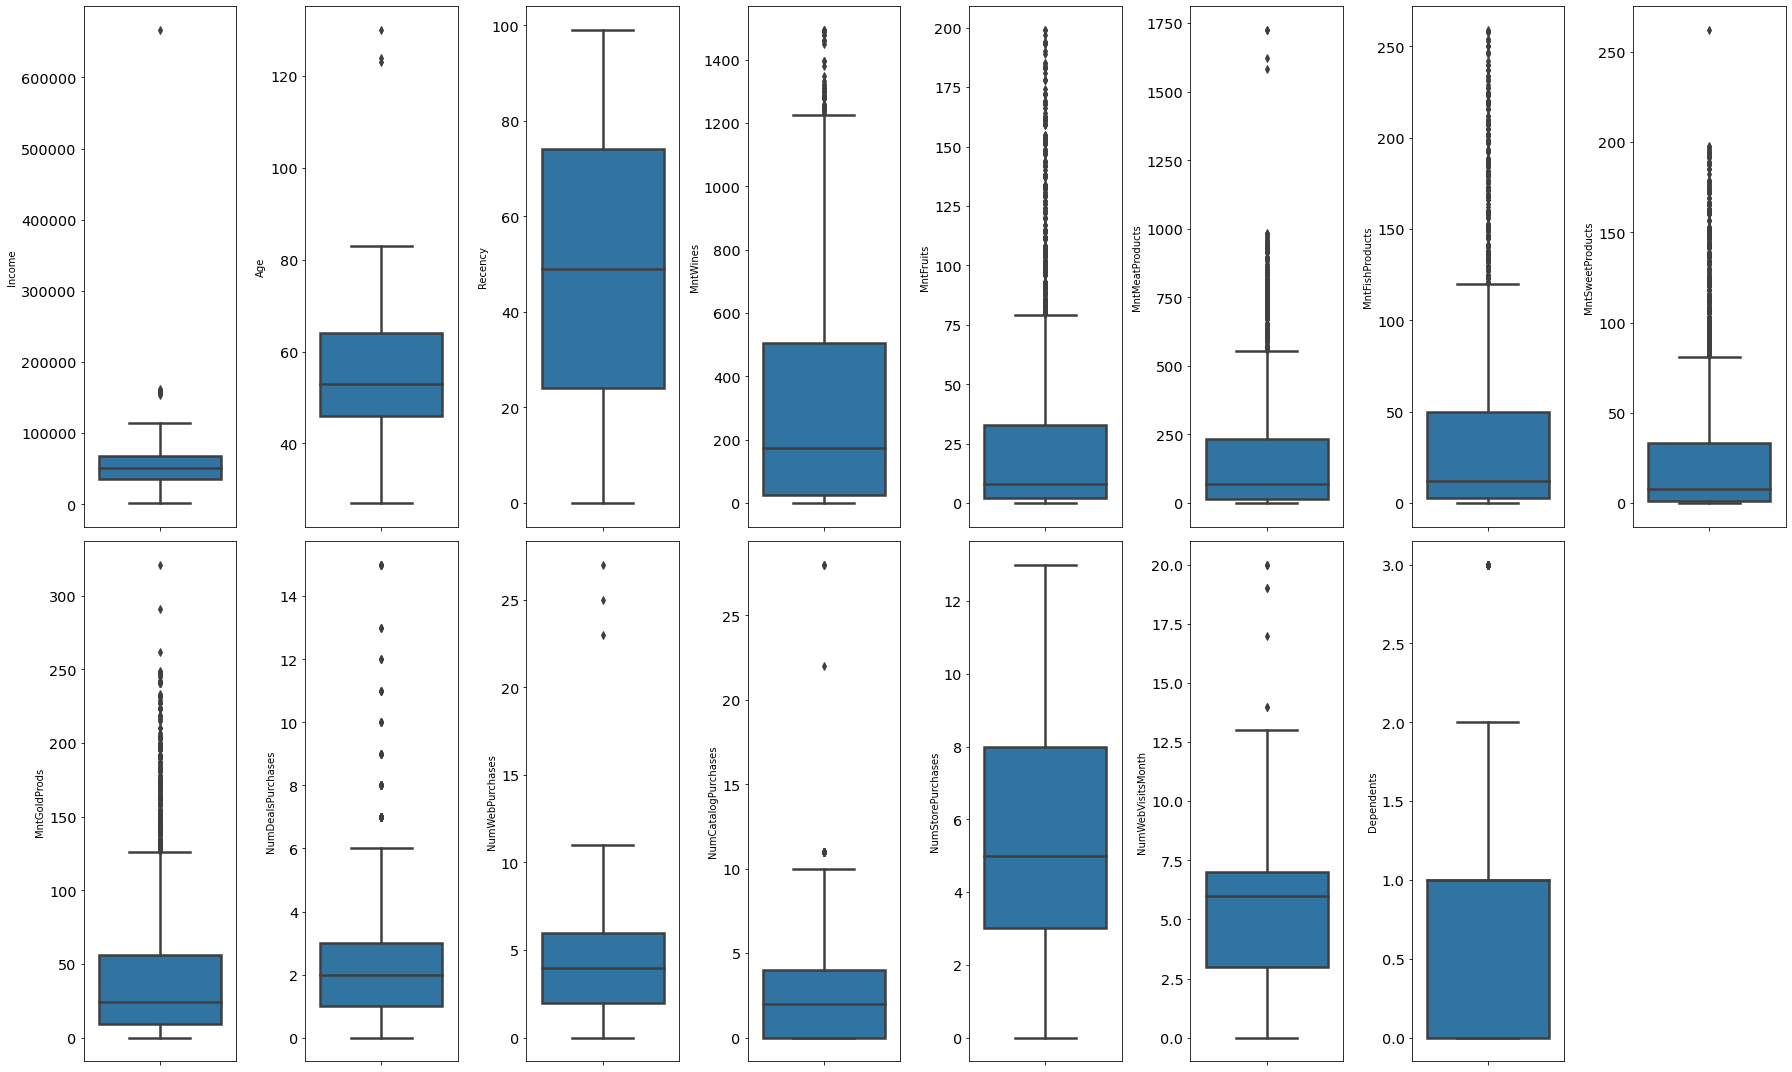

In [ ]:
nums = ['Income','Age','Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth','Dependents']

plt.figure(figsize=(25, 15))
for i in range(0, len(nums)):
    plt.subplot(2, 8, i+1)
    sns.boxplot(y=df[nums[i]], orient='v')
    plt.tight_layout()

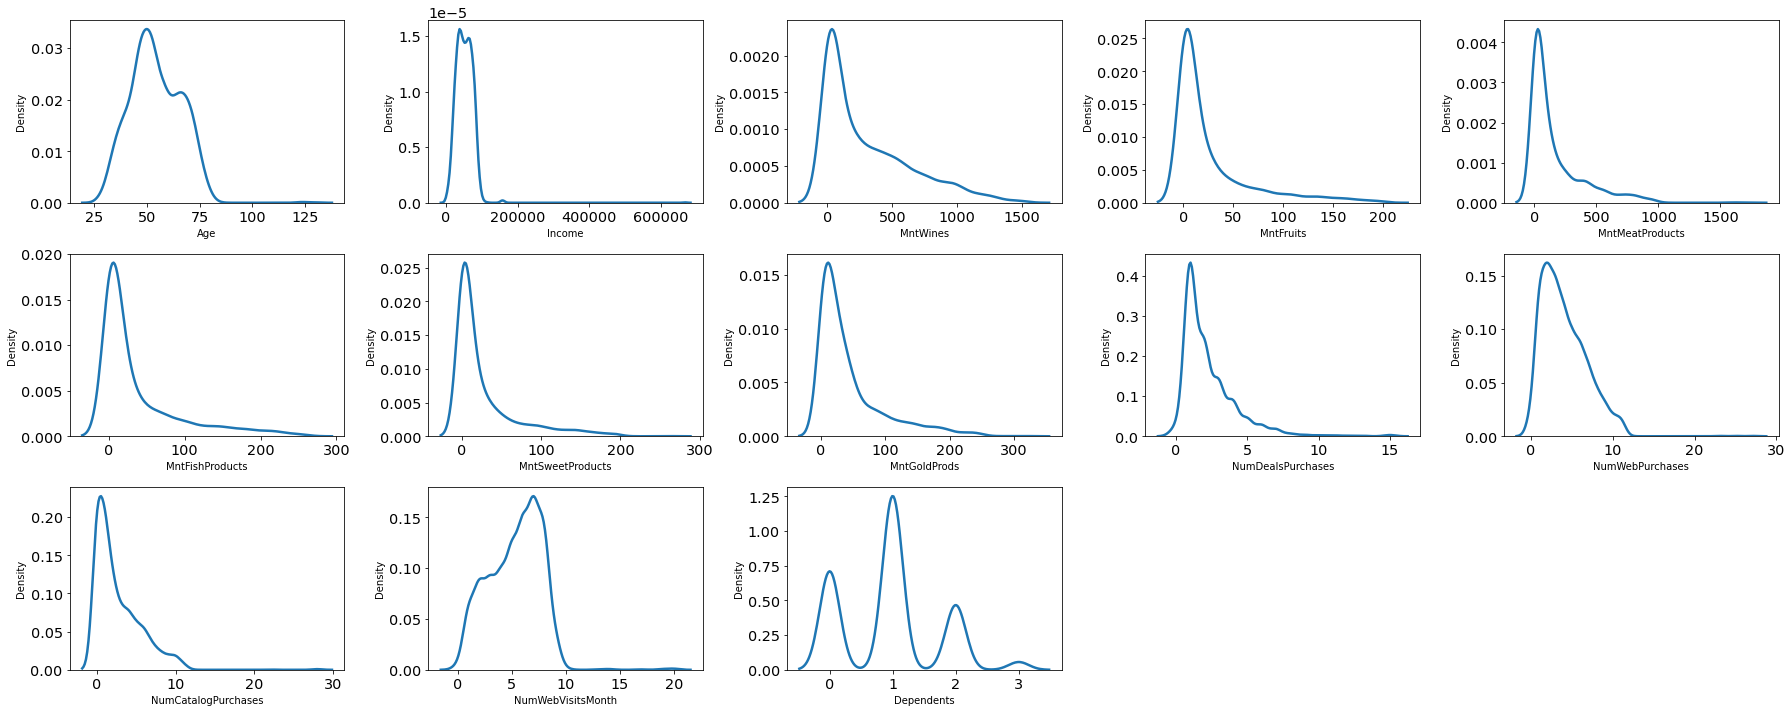

In [ ]:
data = ['Age', 'Income', 'MntWines', 'MntFruits', 
        'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
        'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 
        'NumCatalogPurchases',  'NumWebVisitsMonth', 'Dependents']
plt.figure(figsize=(25, 10))

for i in range(0, len(data)):
  plt.subplot(3, 5, i+1)
  sns.kdeplot(df[data[i]])
  plt.tight_layout()

In [ ]:
for i in range(0, len(data)):
  skew = df[data[i]].skew(axis = 0, skipna = True)
  print(f'{data[i]}: {skew}')

Age: 0.35366147002882264
Income: 6.7634873728111184
MntWines: 1.1707200955543913
MntFruits: 2.101657525150595
MntMeatProducts: 2.0255768067844633
MntFishProducts: 1.916368950232168
MntSweetProducts: 2.1033275863706797
MntGoldProds: 1.8392309361295713
NumDealsPurchases: 2.415271762315824
NumWebPurchases: 1.1970370130708343
NumCatalogPurchases: 1.8810750511540515
NumWebVisitsMonth: 0.2180430456390019
Dependents: 0.4087482263114007


Columns that have outliers (skewness not in between -0.5 and 0.5): </br>
Income, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases

Since there are many outliers and only a few data in dataset, handling outliers will be done with log transformation.

### Log Transformation


In [ ]:
log = ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 
        'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases']

df_log = df

In [ ]:
# Log Transformation
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method = 'yeo-johnson')

for i in range(0, len(log)):
  df_log[log[i]] = pt.fit_transform(df[[log[i]]])

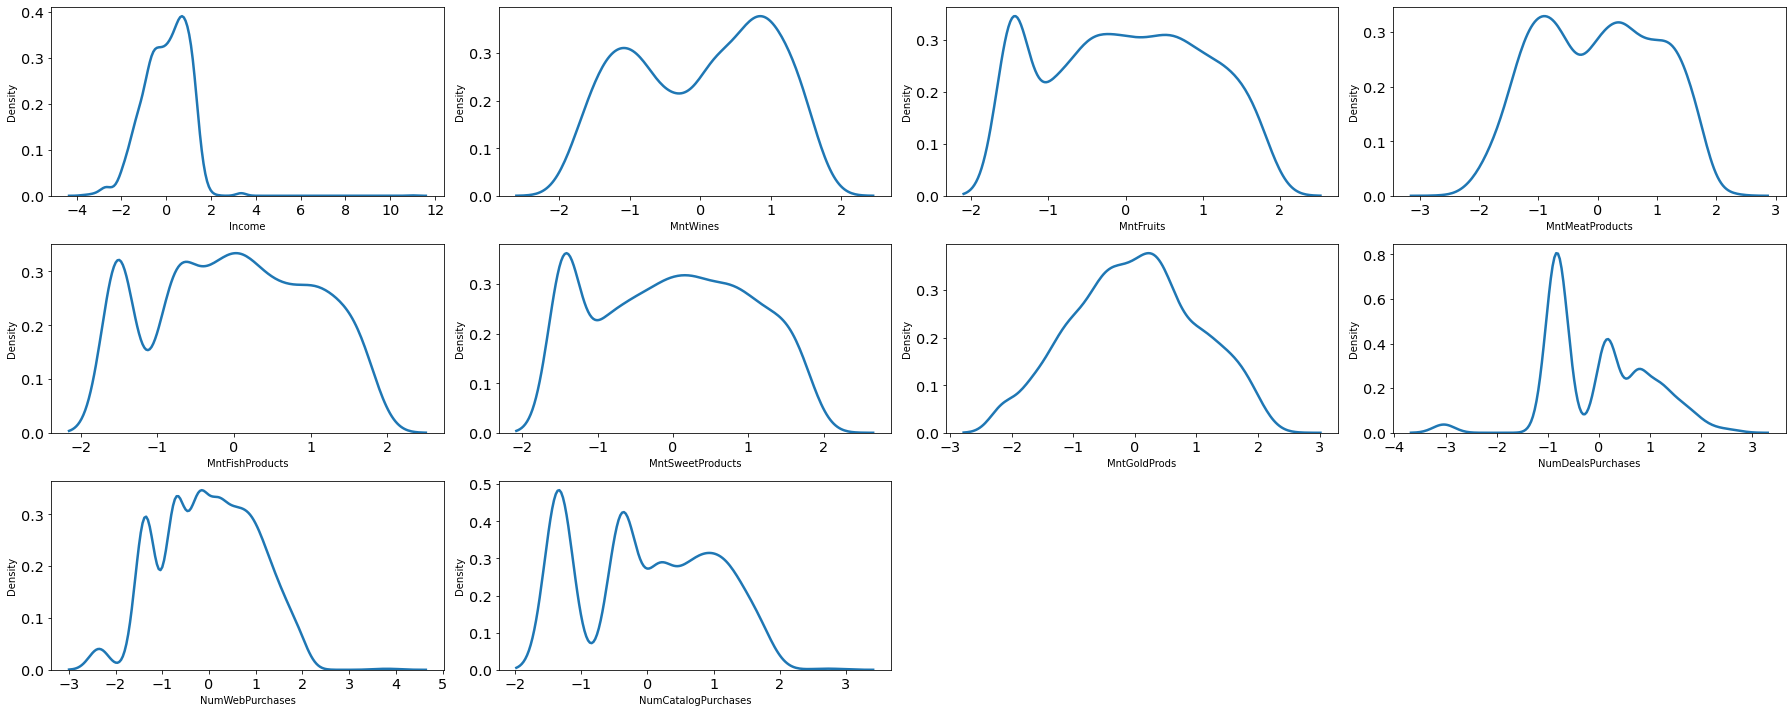

In [ ]:
plt.figure(figsize=(25, 10))

for i in range(0, len(log)):
  plt.subplot(3, 4, i+1)
  sns.kdeplot(df_log[log[i]])
  plt.tight_layout()

In [ ]:
for i in range(0, len(log)):
  skew = df[log[i]].skew(axis = 0, skipna = True)
  print(f'{log[i]}: {skew}')

Income: 0.22699764959433996
MntWines: -0.1480922845301341
MntFruits: 0.017998159066765402
MntMeatProducts: -0.01826741937645039
MntFishProducts: -0.011371185999283868
MntSweetProducts: 0.019469034400947823
MntGoldProds: -0.031229755683501722
NumDealsPurchases: 0.0008994549449180296
NumWebPurchases: -0.01969307884161518
NumCatalogPurchases: 0.029642199000975138


## Split Data

In [ ]:
X = df[['Age', 'Education', 'Status_Divorced', 'Status_Married',
       'Status_Others', 'Status_Single', 'Status_Together', 'Status_Widow', 'Income',
       'Dependents', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2']]
y = df[['Response']]

#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("X_train dataset: ", X_train.shape)  
print("y_train dataset: ", y_train.shape)  
print("X_test dataset: ", X_test.shape)  
print("y_test dataset: ", y_test.shape) 

X_train dataset:  (1551, 27)
y_train dataset:  (1551, 1)
X_test dataset:  (665, 27)
y_test dataset:  (665, 1)


Train data has 1551 rows and test data has 665 rows

## Handling Class Imbalance

In [ ]:
y_train['Response'].value_counts()

0    1318
1     233
Name: Response, dtype: int64

In [ ]:
(233/len(y_train))*100

15.022566086395875

Data is imbalance since only 15.02% of the data that represent customers who accept the last marketing campaign (Response)

### Random Oversampling

In [ ]:
X_over_ro, y_over_ro = over_sampling.RandomOverSampler(random_state=43).fit_resample(X_train, y_train)

In [ ]:
y_over_ro['Response'].value_counts()

0    1318
1    1318
Name: Response, dtype: int64

# Modeling

Since there are a lot of categorical data in the dataset, several algorithm will be tested to see which model fit the best:
- Logistic Regressionn
- Decision Tree
- Random Forest
- AdaBoost
- XGB

### Declaring Function

In [ ]:
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import AdaBoostClassifier 
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, balanced_accuracy_score
from sklearn.metrics import classification_report, make_scorer, log_loss
from sklearn.model_selection import cross_validate

def eval_clf_ro(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_over_ro)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_over_ro)
    
    cls_report_ro_train = classification_report(y_over_ro, y_pred_train)
    print(f"Classification Report (Train) : \n {cls_report_ro_train}")
    cls_report_ro_test = classification_report(y_test, y_pred)
    print(f"Classification Report (Test) : \n {cls_report_ro_test}")
    
    
    acc_test = accuracy_score(y_test, y_pred)
    precision_test = precision_score(y_test, y_pred)
    recall_test = recall_score(y_test, y_pred)
    f1_test = f1_score(y_test, y_pred)
    roc_auc_train = roc_auc_score(y_over_ro, y_pred_proba_train[:, 1])
    roc_auc_test = roc_auc_score(y_test, y_pred_proba[:, 1])

    score = cross_validate(model, X, y, cv=5, scoring='roc_auc', return_train_score=True)
    roc_auc_crossval_train = round(score['train_score'].mean(), 4)
    roc_auc_crossval_test = round(score['test_score'].mean(), 4)
    
    eval_result = {
        'Test Accuracy': acc_test,
        'Test Precision': precision_test,
        'Test Recall': recall_test,
        'Test F1': f1_test,
        'Train ROC AUC': roc_auc_train,
        'Test ROC AUC': roc_auc_test,
        'Crossval Train ROC AUC': roc_auc_crossval_train,
        'Crossval Test ROC AUC': roc_auc_crossval_test
    }
    return eval_result

def get_metrics(y_pred, y_act, model_name):
    recall =  recall_score(y_act, y_pred)
    precision = precision_score(y_act, y_pred)
    roc_auc = roc_auc_score(y_act, y_pred)
    f1 = f1_score(y_act, y_pred)
    accuracy = balanced_accuracy_score(y_act, y_pred)

    metrics_result = dict(model_name=model_name, 
                        recall=recall, 
                        precision=precision, 
                        roc_auc=roc_auc, 
                        f1=f1,
                        accuracy=accuracy)
    return metrics_result

def prediction(X_train, y_train, X_test, y_test, clf, model_name='decision tree'):
  
    clf = clf
    clf.fit(X_train, y_train)
    y_test_pred = clf.predict(X_test)
    y_train_pred = clf.predict(X_train)


    result = dict()
    test_result = get_metrics(y_pred=y_test_pred, y_act=y_test, model_name=model_name)
    train_result = get_metrics(y_pred=y_train_pred, y_act=y_train, model_name=model_name)

    result['test'] = test_result
    result['train'] = train_result
    result['y_test'] = y_test
    result['y_test_pred'] = y_test_pred
    result['y_train'] = y_train
    result['y_train_pred'] = y_train_pred
    result['clf'] = clf
    result['x_train'] = X_train
    result['x_test'] = X_test

    del clf

    return result

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

### Model Fitting

In [ ]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest Classifier', 'XGB Classifier', 'AdaBoost Classifier']
algorithms = [LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, XGBClassifier, AdaBoostClassifier]

# Result List
acc_test_ro = []
precision_test_ro = []
recall_test_ro = []
f1_test_ro = []
roc_auc_train_ro = []
roc_auc_test_ro = []
roc_auc_crossval_train_ro = []
roc_auc_crossval_test_ro = []

In [ ]:
# Model Evaluation using Random Oversampling Data
i = 0

for model_type in algorithms:
    # Fitting and using the algorithms
    model = model_type()
    model.fit(X_over_ro, y_over_ro)
    print(models[i])
    result = eval_clf_ro(model)
    
    # Adding the results to the list
    acc_test_ro.append(result['Test Accuracy'])
    precision_test_ro.append(result['Test Precision'])
    recall_test_ro.append(result['Test Recall'])
    f1_test_ro.append(result['Test F1'])
    roc_auc_train_ro.append(result['Train ROC AUC'])
    roc_auc_test_ro.append(result['Test ROC AUC'])
    roc_auc_crossval_train_ro.append(result['Crossval Train ROC AUC'])
    roc_auc_crossval_test_ro.append(result['Crossval Test ROC AUC'])
    
    i += 1

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression
Classification Report (Train) : 
               precision    recall  f1-score   support

           0       0.80      0.81      0.81      1318
           1       0.81      0.80      0.81      1318

    accuracy                           0.81      2636
   macro avg       0.81      0.81      0.81      2636
weighted avg       0.81      0.81      0.81      2636

Classification Report (Test) : 
               precision    recall  f1-score   support

           0       0.97      0.84      0.90       565
           1       0.49      0.85      0.62       100

    accuracy                           0.84       665
   macro avg       0.73      0.85      0.76       665
weighted avg       0.90      0.84      0.86       665



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Decision Tree
Classification Report (Train) : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1318
           1       1.00      1.00      1.00      1318

    accuracy                           1.00      2636
   macro avg       1.00      1.00      1.00      2636
weighted avg       1.00      1.00      1.00      2636

Classification Report (Test) : 
               precision    recall  f1-score   support

           0       0.90      0.90      0.90       565
           1       0.41      0.41      0.41       100

    accuracy                           0.82       665
   macro avg       0.65      0.65      0.65       665
weighted avg       0.82      0.82      0.82       665

Random Forest Classifier
Classification Report (Train) : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1318
           1       1.00      1.00      1.00      1318

    accuracy                           1.0

### Fitting Result

In [ ]:
ro_df = pd.DataFrame(list(zip(models, acc_test_ro, precision_test_ro, recall_test_ro, f1_test_ro, roc_auc_train_ro, roc_auc_test_ro, roc_auc_crossval_train_ro, roc_auc_crossval_test_ro)), columns=['Model', 'Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1', 'Train ROC AUC', 'Test ROC AUC', 'Crossval Train ROC AUC', 'Crossval Test ROC AUC'])
ro_df

,Model,Test Accuracy,Test Precision,Test Recall,Test F1,Train ROC AUC,Test ROC AUC,Crossval Train ROC AUC,Crossval Test ROC AUC
0,Logistic Regression,0.842105,0.485714,0.85,0.618182,0.893570,0.911195,0.8915,0.8799
1,Decision Tree,0.827068,0.424242,0.42,0.422111,0.999974,0.659779,0.9998,0.6959
2,Random Forest Classifier,0.878195,0.655738,0.40,0.496894,0.999973,0.868504,0.9998,0.8713
3,XGB Classifier,0.846617,0.493056,0.71,0.581967,0.982103,0.890115,0.9696,0.8902
4,AdaBoost Classifier,0.825564,0.451807,0.75,0.563910,0.939716,0.880124,0.9314,0.8704


Since the target (Response) is non-linear and overfitting, random forest is the most suitable algorithm for the dataset.

### Random Forest 

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_over_ro, y_over_ro)
eval_clf_ro(rf)

Classification Report (Train) : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1318
           1       1.00      1.00      1.00      1318

    accuracy                           1.00      2636
   macro avg       1.00      1.00      1.00      2636
weighted avg       1.00      1.00      1.00      2636

Classification Report (Test) : 
               precision    recall  f1-score   support

           0       0.90      0.95      0.93       565
           1       0.61      0.40      0.48       100

    accuracy                           0.87       665
   macro avg       0.75      0.68      0.70       665
weighted avg       0.86      0.87      0.86       665



{'Test Accuracy': 0.8706766917293233,
 'Test Precision': 0.6060606060606061,
 'Test Recall': 0.4,
 'Test F1': 0.4819277108433735,
 'Train ROC AUC': 0.9999700654645265,
 'Test ROC AUC': 0.8790530973451327,
 'Crossval Train ROC AUC': 0.9998,
 'Crossval Test ROC AUC': 0.8742}

#### Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#List Hyperparameters
hyperparameters = dict(
                       n_estimators = [int(x) for x in np.linspace(start = 1, stop = 1000, num = 20)],
                       bootstrap = [True, False], 
                       criterion = ['gini','entropy'],
                       max_depth = [int(x) for x in np.linspace(10, 110, num = 11)],  
                       min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 5)],
                       min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)],
                       max_features = ['auto', 'sqrt', 'log2'], # No. of feature considered in each split
                       n_jobs = [-1] # Core for parallel computation. -1 to use all core
                      )

# Init
rf = RandomForestClassifier(random_state=42)
rf_tuned = RandomizedSearchCV(rf, hyperparameters, cv=5, random_state=42, scoring='roc_auc')

# Predict & Evaluation
rf_hyper = prediction(X_over_ro, y_over_ro, X_test, y_test, rf_tuned, model_name='random forest_hyperparam')


In [ ]:
show_best_hyperparameter(rf_tuned.best_estimator_, hyperparameters)

Best n_estimators: 158
Best bootstrap: True
Best criterion: gini
Best max_depth: 110
Best min_samples_split: 4
Best min_samples_leaf: 1
Best max_features: log2
Best n_jobs: -1


In [ ]:
from numpy.ma.core import log2
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import metrics
rf2 = RandomForestClassifier(n_estimators = 158, 
                              bootstrap = True, 
                              criterion = 'gini',
                              max_depth = 110,  
                              min_samples_split = 4, 
                              min_samples_leaf = 1, 
                              max_features = 'log2', 
                              n_jobs = -1,
                              random_state = 42)
rf2.fit(X_over_ro, y_over_ro)
eval_clf_ro(rf2)

Classification Report (Train) : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1318
           1       1.00      1.00      1.00      1318

    accuracy                           1.00      2636
   macro avg       1.00      1.00      1.00      2636
weighted avg       1.00      1.00      1.00      2636

Classification Report (Test) : 
               precision    recall  f1-score   support

           0       0.90      0.97      0.93       565
           1       0.69      0.41      0.52       100

    accuracy                           0.88       665
   macro avg       0.80      0.69      0.72       665
weighted avg       0.87      0.88      0.87       665



{'Test Accuracy': 0.8842105263157894,
 'Test Precision': 0.6949152542372882,
 'Test Recall': 0.41,
 'Test F1': 0.5157232704402516,
 'Train ROC AUC': 0.9999424335856277,
 'Test ROC AUC': 0.8789557522123893,
 'Crossval Train ROC AUC': 0.9997,
 'Crossval Test ROC AUC': 0.878}

Label 1 results are still below 0.5, which indicates unfavorable results. On the other hand, we prioritize the ROC AUC metric beacuse the dataset is imbalance. The train-test gap from the ROC AUC score is still > 0.1, indicating an overfitting. Hence, another hyperparameter tuning will be done to get the best results.

In [ ]:
rfc = RandomForestClassifier(n_estimators = 560, 
                       bootstrap = True, 
                       criterion = 'gini',
                       max_depth = 7,  
                       min_samples_split = 17, 
                       min_samples_leaf = 15, 
                       max_features = 'log2', 
                       n_jobs = -1,
                       random_state = 42)
rfc.fit(X_over_ro, y_over_ro)
eval_clf_ro(rfc)

Classification Report (Train) : 
               precision    recall  f1-score   support

           0       0.89      0.90      0.89      1318
           1       0.89      0.89      0.89      1318

    accuracy                           0.89      2636
   macro avg       0.89      0.89      0.89      2636
weighted avg       0.89      0.89      0.89      2636

Classification Report (Test) : 
               precision    recall  f1-score   support

           0       0.94      0.88      0.91       565
           1       0.50      0.70      0.58       100

    accuracy                           0.85       665
   macro avg       0.72      0.79      0.75       665
weighted avg       0.88      0.85      0.86       665



{'Test Accuracy': 0.849624060150376,
 'Test Precision': 0.5,
 'Test Recall': 0.7,
 'Test F1': 0.5833333333333334,
 'Train ROC AUC': 0.9658095795118828,
 'Test ROC AUC': 0.8873893805309734,
 'Crossval Train ROC AUC': 0.9276,
 'Crossval Test ROC AUC': 0.8663}

After hyperparameter tuning, the train-test gap has become smaller. The gap is less than 0.1, which indicates neither overfitting nor underfitting. As a result, the model after hyperparameter tuning is preferred.

#### Learning Curve

param value: 1; train: 0.9853781307494455; test: 0.889353982300885
param value: 2; train: 0.984259039654049; test: 0.8889469026548673
param value: 3; train: 0.983671286563308; test: 0.8882920353982301
param value: 5; train: 0.9813841729202981; test: 0.8905752212389381
param value: 6; train: 0.9799542231872912; test: 0.8905221238938053
param value: 7; train: 0.9790337362214788; test: 0.8874424778761062
param value: 9; train: 0.9770223657033119; test: 0.8899203539823007
param value: 10; train: 0.9746799883025046; test: 0.889070796460177
param value: 11; train: 0.9730364671721764; test: 0.8920619469026547
param value: 13; train: 0.9709537143001882; test: 0.8899911504424778
param value: 14; train: 0.9687224400791192; test: 0.8877964601769912
param value: 15; train: 0.9679907709524478; test: 0.8898141592920352
param value: 17; train: 0.964099281340883; test: 0.887796460176991
param value: 18; train: 0.9629444990685755; test: 0.8874778761061946
param value: 20; train: 0.959101940909227; test

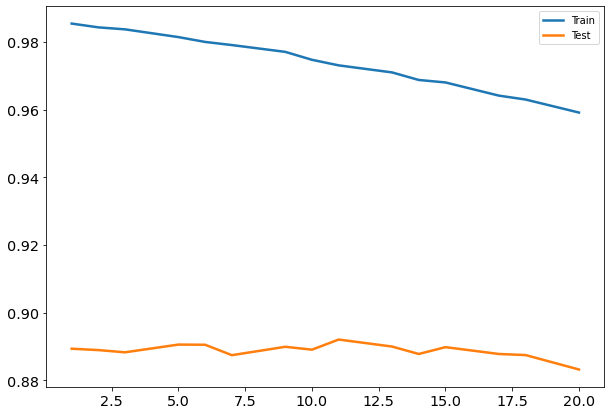

In [ ]:
param_values = [int(x) for x in np.linspace(start = 1, stop = 20, num = 15)]

train_scores = []
test_scores = []

for c in param_values:
  model = RandomForestClassifier(n_estimators = 560, max_depth = 7, min_samples_split = 17, min_samples_leaf = c) 

  model.fit(X_over_ro, y_over_ro)

  # eval on train
  y_pred_train_proba = model.predict_proba(X_over_ro)
  train_auc = roc_auc_score(y_over_ro, y_pred_train_proba[:,1])
  train_scores.append(train_auc)

  # eval on test
  y_pred_proba = model.predict_proba(X_test)
  test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
  test_scores.append(test_auc)

  print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: ' + str(test_auc))

plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

### Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

rfc_pred = rfc.predict(X_test)
rfc_pred_train = rfc.predict(X_over_ro)

rfc_cm = confusion_matrix(y_test, rfc_pred)
print(rfc_cm)

[[495  70]
 [ 30  70]]


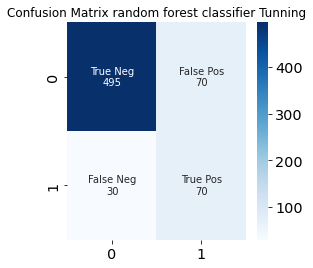

In [ ]:
import seaborn as sns
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                rfc_cm.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize=(4,4))
sns.heatmap(rfc_cm, annot=labels, fmt='', cmap='Blues')
plt.title('Confusion Matrix random forest classifier Tunning')
plt.show()

**True negative:** when the company thought customers will **reject** the campaign while in reality the customers will **reject** it. </br>
**False negative:** when the company thought customers will **reject** the campaign while in reality the customers will **accept** it. </br>
**False positive:** when the company thought customers will **accept** the campaign while in reality the customers will **reject** it. </br>
**True positive:** when the company thought customers will **accept** the campaign while in reality the customers will **accept** it.

## Feature Importance

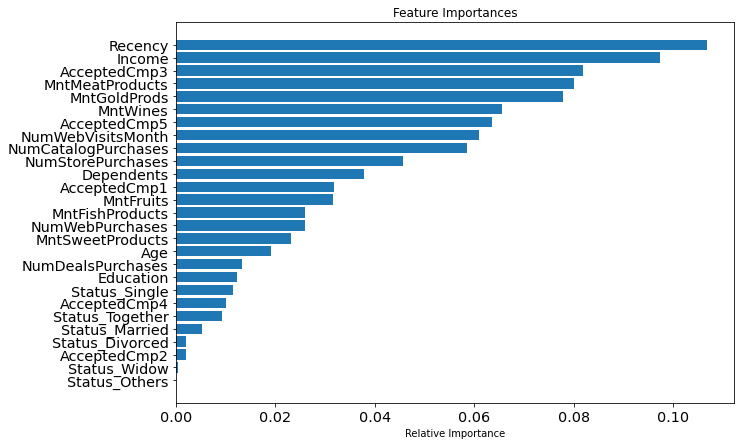

In [ ]:
features = X.columns
importances = rfc.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 9.5 MB/s eta 0:00:00


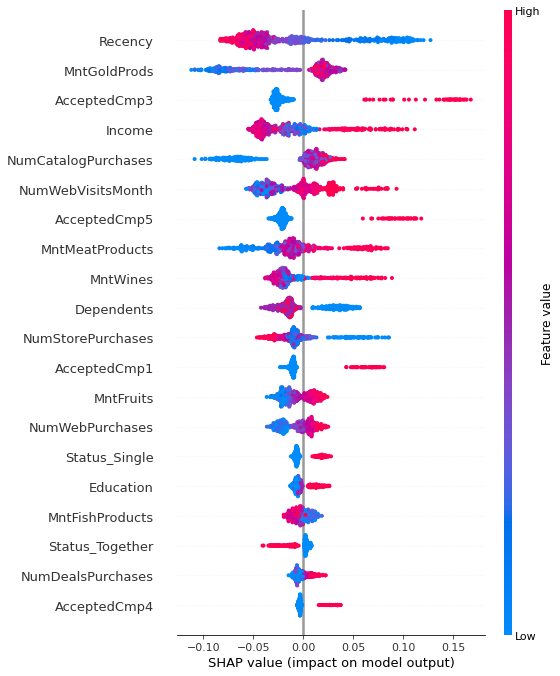

In [ ]:
import shap
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test)

Features that most influenced customers' acceptance of the last marketing campaign were:
- Low **recency**: customers who recently made a purchase
- High **MntGoldProducts**: customers who buy gold products in large quantities
- High **income**: customers with high income


Recommendation:
- Target campaigns at customers who recently made a purchase. Based on EDA of recency vs. response, most customers who accepted the campaign were **customers who made a purchase in the last 20 days or less**
- Target campaigns at **customers who buy a lot of gold products or conduct campaigns related to gold products**
- Conducting **campaigns for customers with high income, however,** not all customers with high income accepted the last marketing campaign (response), as can be seen from the red dots that have negative shap values. Hence, it is necessary to further examine the income range of customers who will accept marketing campaigns. Based on the EDA of income vs. response, it can be seen that **none of the customers with incomes above 120000 accepted the campaign**

# Business Simulation

From the dataset:
- Cost marketing campaign: 3 per customer (assumption in dollar)
- Revenue marketing campaign: 11 per customer if they accept the campaign (assumption in dollar)
- Number of customers who accept the last marketing campaign: 334
- Total customers: 2240

Business metrics **before** using machine learning:
- Loss from marketing campaign: (334 x 11) - (2240 x 3) = -3046 (assumption in dollar)
- Response rate: 334/2240 = 14.9%

After using machine learning:
- Number of customers who received the campaign: TP + FP = 70 + 70 = 140
- Number of customers who accepted the campaign: TP = 70 

Business metrics **after** using machine learning:
- Profit from marketing campaign: (70 x 11) - (140 x 3) = 350 (assumption in dollar)
- Response rate: 70/140 = 50%